In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import re
import random
from sympy import symbols, solve, Eq
import math
from datetime import datetime
from datetime import timedelta

<h1><center> <font color=red>Aodong Weight Loss Progress </center></h1>
    
> #### All data provided by Renpho bluetooth scale. 
> #### Body composition data only available after Day 41 (08/17/2022)
> #### Due to COVID symptoms, training stopped on 10/17/2022 and resumed on 10/20/2022. Data from 10/16/2022-10/19/2022 will be discarded.

### Helper Functions: 

In [52]:
def getBestLineFit(xx, yy, axess, displayEqn):
    x = xx
    y = yy
    a, b = np.polyfit(x, y, 1)
    c = '#c99aff'
    axess.plot(x, a*x+b, color=c, linestyle='--', linewidth=2)
    if(displayEqn):
        axess.text(0.21, 0.97, 'y = ' + '{:.4f}'.format(b) + ' + {:.4f}'.format(a) + 'x', color=c, 
                   size=20, horizontalalignment='center', verticalalignment='center', transform=axess.transAxes)

In [53]:
def labelPoints(inteval, x, y, axess):
    a = x.max() - x.min()
    b = y.max() - y.min()
    for i in reversed(range(a+1)):
        if(i % inteval == 0):
            axess.text(x[i]+0.006*a,y[i]+0.036*b,'Day ' + str(x[i]) + ': ' + '{:.2f}'.format(y[i]))

In [54]:
def plotSegment(start, end, axess,c,showDataPoints=True, joinLine = False):
    x = df['Day'][start:end]
    y = df['Weight(lb)'][start:end]
    a, b = np.polyfit(x, y, 1)
    m = 'None' if (not showDataPoints) else 'o'
    l = 'None' if (not joinLine) else 'dotted'
    axess.plot(x, y, color=c, marker=m, ms = 4, linestyle=l)
    axess.plot(x, a*x+b, label='Day' + str(start+1) + '-' + str(end) + ': y='+'{:.4f}'.format(b)+'{:.4f}'.format(a)+'x',linestyle='--',color=c,lw=2)    

In [73]:
def CalculateDaysToAchieveGoal(xx, yy, goal, restDayCount):
    x = xx
    y = yy
    a, b = np.polyfit(x, y, 1)
    
    k = symbols('k')
    eqn_to_solve = Eq(b + a * k, goal)
    sol = math.ceil(solve(eqn_to_solve)[0]) + restDayCount
    
    print('Days needed to achieve the goal of ' + str(goal) + ': ' + str(sol) + ' Days')

    beginDateString = "2022-07-06"
    beginDate = datetime.strptime(beginDateString, "%Y-%m-%d")
    print("Beginning date:")
    print(beginDate)
  
    endDate = beginDate + timedelta(days=int(sol))
    print("Ending date:")
    print(endDate)

***

### Overall Trend

In [69]:
df[ (df['Remarks'] == 'REST') | (df['Remarks'] == 'COVID') ]

,Time of Measurement,Weight(lb),BMI,Body Fat(%),Fat-free Body Weight(lb),Subcutaneous Fat(%),Visceral Fat,Body Water(%),Skeletal Muscle(%),Muscle Mass(lb),Bone Mass(lb),Protein(%),BMR(kcal),Metabolic Age,Remarks,Day,DayFull


In [74]:
df = pd.read_csv ('/Users/aodongliu/Random/weightloss/data/renpho_data_10242022.csv')
df = df[::-1]
restDayCount = len( df[ (df['Remarks'] == 'REST') | (df['Remarks'] == 'COVID') ] )
# Remove data during COVID recovery
df = df[df['Remarks'] != 'COVID']
len(df)

106

In [75]:
# Extract body composition data from dataframe since they are only available after day 41
daysAfter40 = df['Day'][40:]
bodyFatData =  np.array([float(i) for i in df['Body Fat(%)'][40:]])
visceralFatData =  np.array([float(i) for i in df['Visceral Fat'][40:]])

# Set y-tick spacing
weight_interval = 15
BMI_interval = 2
bodyFact_interval = 1

# Whether to show best line fit equation on the graph
displayEqn = True

# Whether to label datapoints every user-defined interval
labelProgress = False

In [76]:
df['Day']

109      1
108      2
107      3
106      4
105      5
      ... 
4      102
3      103
2      104
1      105
0      106
Name: Day, Length: 106, dtype: int64

In [77]:
df['Weight(lb)']

109    324.8
108    322.6
107    322.0
106    323.0
105    321.4
       ...  
4      236.8
3      234.8
2      232.2
1      230.6
0      229.2
Name: Weight(lb), Length: 106, dtype: float64

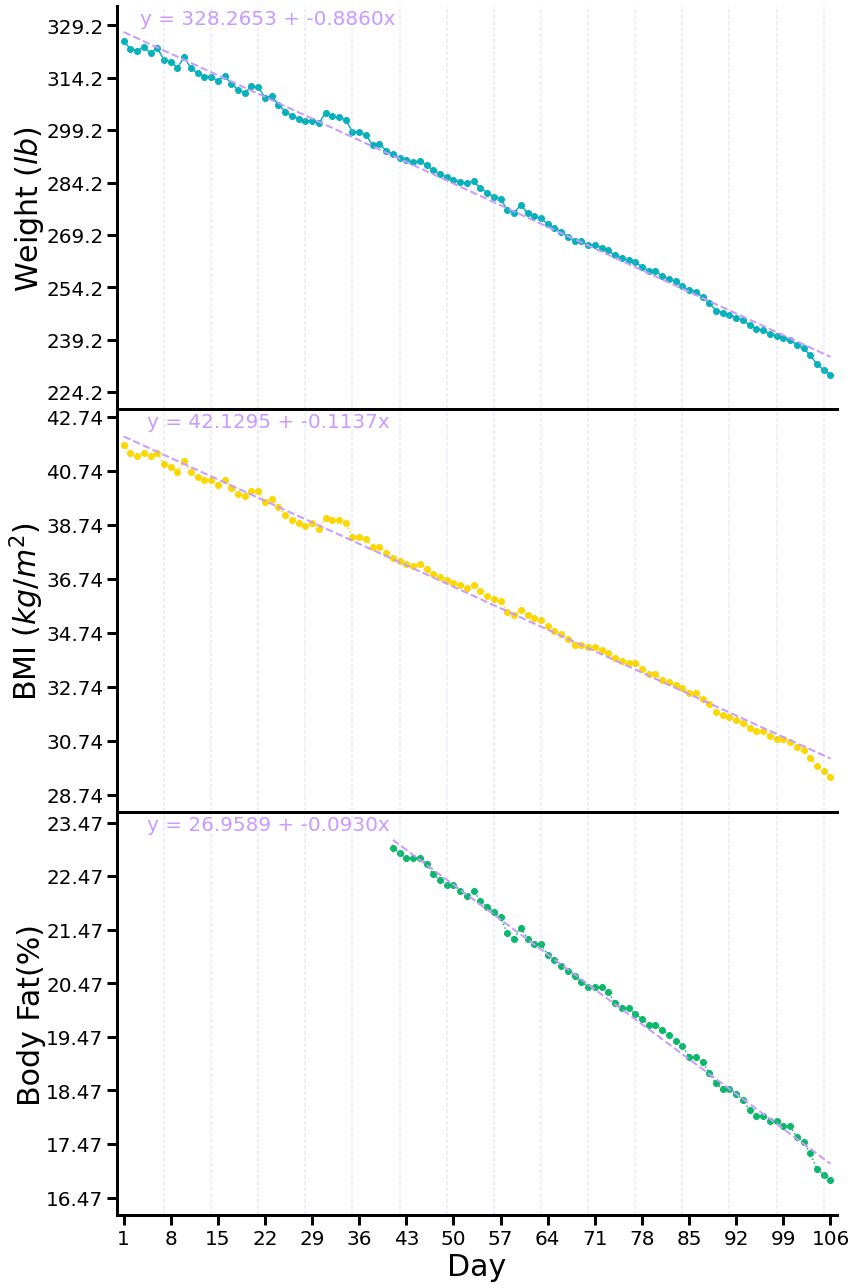

In [78]:
fig, ax = plt.subplots(3, 1,figsize =(12, 18), sharex=True, sharey='row', gridspec_kw={'hspace': 0},tight_layout=True)


ax[0].plot(df['Day'], df['Weight(lb)'], marker='o', linestyle = '-', color ='#07b1bc',  label ='Weight')
ax[0].set_ylim(df['Weight(lb)'].min()-0.66*weight_interval,df['Weight(lb)'].max()+0.66*weight_interval)
ax[0].set_yticks(np.arange(df['Weight(lb)'].min()-0.33*weight_interval,df['Weight(lb)'].max()+0.66*weight_interval,weight_interval))
ax[0].set_ylabel('Weight ($lb$)',fontsize=30,labelpad = 0.4) 
getBestLineFit(df['Day'], df['Weight(lb)'], ax[0], displayEqn)
if (labelProgress): labelPoints(7, df['Day'],df['Weight(lb)'], ax[0])
    

ax[1].plot(df['Day'], df['BMI'], marker='o', linestyle = ':', color ='#fdd800')
ax[1].set_ylim(df['BMI'].min()-0.66*BMI_interval,df['BMI'].max()+0.66*BMI_interval)
ax[1].set_yticks(np.arange(df['BMI'].min()-0.33*BMI_interval,df['BMI'].max()+0.66*BMI_interval,BMI_interval))
ax[1].set_ylabel('BMI ($kg/m^2$)',fontsize=30,labelpad = 0.4)
getBestLineFit(df['Day'], df['BMI'], ax[1], displayEqn)
if (labelProgress): labelPoints(7, df['Day'],df['BMI'], ax[1])
    
    
ax[2].plot(daysAfter40, bodyFatData, marker='o', linestyle = ':', color ='#0ab86b')
ax[2].set_ylim(bodyFatData.min()-0.66*bodyFact_interval, bodyFatData.max()+0.66*bodyFact_interval)
ax[2].set_yticks(np.arange(bodyFatData.min()-0.33*bodyFact_interval,bodyFatData.max()+0.66*bodyFact_interval,bodyFact_interval))
ax[2].set_ylabel('Body Fat(%)',fontsize=30,labelpad = 0.4)
getBestLineFit(daysAfter40, bodyFatData, ax[2], displayEqn)
if (labelProgress): labelPoints(7, daysAfter40, np.flip(bodyFatData), ax[2])

    
ax[2].tick_params(axis='x', labelsize=20)
ax[2].set_xlim(0,df['Day'].max()+1)
ax[2].set_xticks(np.arange(1, df['Day'].max()+1,7))


ax[0].spines['top'].set_visible(False)
ax[1].spines["top"].set_linewidth(3)
ax[2].spines["top"].set_linewidth(3)

for i in range(3):
    ax[i].spines["left"].set_linewidth(3)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines["bottom"].set_linewidth(3)
    
    ax[i].tick_params(axis='y', labelsize=20)
    
    ax[i].tick_params(direction='out', axis ='y', which ='both', length=10, width=3)
    ax[i].tick_params(direction='out', axis ='x', which ='both', length=10, width=3)
    
    # Add vertical lines in between each week to help visualize progress
    for j in np.arange(0, df['Day'].max()+1,7):
        ax[i].axvline(x=j,linewidth=0.4, color='#a7b9d7', linestyle=(0, (10, 5)))
             
plt.xlabel("Day",fontsize=30)
plt.savefig('/Users/aodongliu/Random/weightloss/plots/10242022.pdf',dpi=3600,bbox_inches="tight")
plt.show()


***

### Segmented Trend 

In [79]:
# divide all data into groups to monitor the change in weight loss trend
day_interval = 10

nums_segments = df['Day'].size // day_interval

hexadecimal_alphabets = '0123456789ABCDEF'

# randomly create different colors to differentiate different segments
colors = ["#" + ''.join([random.choice(hexadecimal_alphabets) for j in range(6)]) for i in range(nums_segments+1)]

# whether to show data points on the graph
showDataPoints = True

# whether to connect the data points
joinLine = False

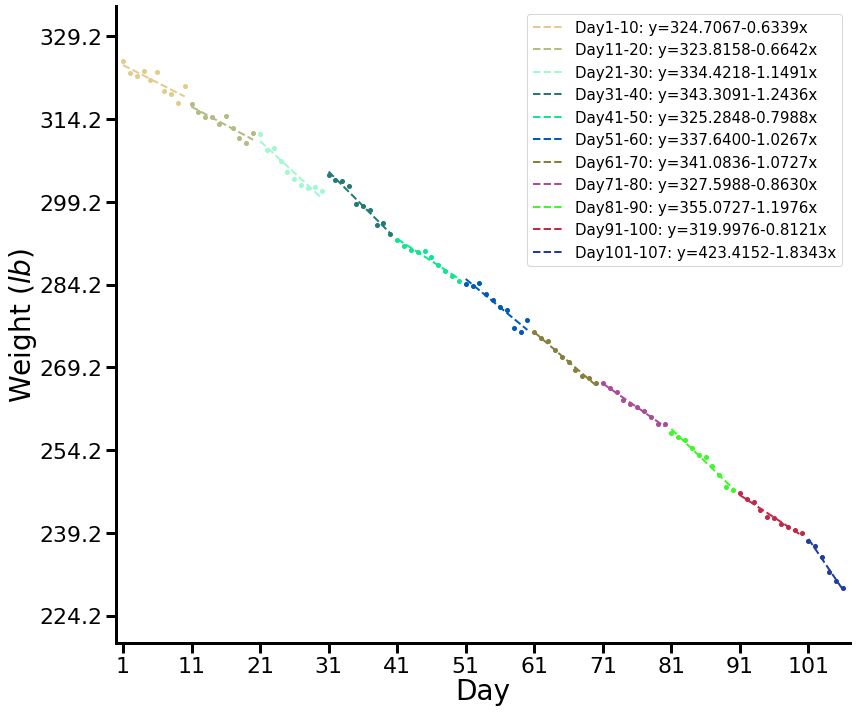

In [80]:
fig, ax1 = plt.subplots(1,1, figsize=(12,10), tight_layout=True)

# plot weight trend for every user-specified inteval 
for i in range(nums_segments):
    nexti = (i+1)* day_interval
    plotSegment(i*day_interval,nexti,ax1,colors[i], showDataPoints, joinLine )

# if we have more than 3 leftover data points, plot them on the graph as the final segment
if(df['Day'].size - nums_segments*day_interval > 3): plotSegment(nums_segments*day_interval, df['Day'].size+1, ax1, colors[-1], showDataPoints, joinLine)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines["left"].set_linewidth(3)
ax1.spines["bottom"].set_linewidth(3)

ax1.set_ylim(df['Weight(lb)'].min()-0.66*weight_interval,df['Weight(lb)'].max()+0.66*weight_interval)
ax1.set_yticks(np.arange(df['Weight(lb)'].min()-0.33*weight_interval,df['Weight(lb)'].max()+0.66*weight_interval,weight_interval))
ax1.set_ylabel('Weight ($lb$)',fontsize=28,labelpad = 0.4)

ax1.set_xlim(0,df['Day'].max()+1)
ax1.set_xticks(np.arange(1, df['Day'].max()+1,day_interval))
ax1.set_xlabel('Day',fontsize=28,labelpad = 0.4)

ax1.tick_params(direction='out', axis ='y', which ='both', length=10, width=3,labelsize=22)
ax1.tick_params(direction='out', axis ='x', which ='both', length=10, width=3,labelsize=22)

plt.legend(fontsize=15)

plt.tight_layout()
plt.savefig('/Users/aodongliu/Random/weightloss/plots/segmented_trend.pdf',dpi=3600,bbox_inches="tight")
plt.show()


***

### Date/Goal Calculator

### Not Fat Level (BMI <= 30):

In [81]:
weight_goal = 2.206 * 1.88 * 1.88 * 30
CalculateDaysToAchieveGoal(df['Day'], df['Weight(lb)'], weight_goal, restDayCount)

Days needed to achieve the goal of 233.90659199999993: 111 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-10-25 00:00:00


In [82]:
bmi_goal = 30
CalculateDaysToAchieveGoal(df['Day'], df['BMI'], bmi_goal, restDayCount)

Days needed to achieve the goal of 30: 111 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-10-25 00:00:00


In [83]:
bodyFat_goal = 17
CalculateDaysToAchieveGoal(daysAfter40, bodyFatData, bodyFat_goal, restDayCount)

Days needed to achieve the goal of 17: 112 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-10-26 00:00:00


In [84]:
visceralFat_goal = 11
CalculateDaysToAchieveGoal(daysAfter40, visceralFatData, visceralFat_goal, restDayCount)

Days needed to achieve the goal of 11: 121 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-11-04 00:00:00


### Minimum Level:

In [85]:
weight_goal = 220
CalculateDaysToAchieveGoal(df['Day'][60:], df['Weight(lb)'][60:], weight_goal, restDayCount)

Days needed to achieve the goal of 220: 123 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-11-06 00:00:00


In [86]:
bmi_goal = 28
CalculateDaysToAchieveGoal(df['Day'], df['BMI'], bmi_goal, restDayCount)

Days needed to achieve the goal of 28: 129 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-11-12 00:00:00


In [87]:
bodyFat_goal = 15
CalculateDaysToAchieveGoal(daysAfter40, bodyFatData, bodyFat_goal, restDayCount)

Days needed to achieve the goal of 15: 133 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-11-16 00:00:00


In [88]:
visceralFat_goal = 9
CalculateDaysToAchieveGoal(daysAfter40, visceralFatData, visceralFat_goal, restDayCount)

Days needed to achieve the goal of 9: 139 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-11-22 00:00:00


### Ideal Level:

In [89]:
weight_goal = 205
CalculateDaysToAchieveGoal(df['Day'], df['Weight(lb)'], weight_goal, restDayCount)

Days needed to achieve the goal of 205: 144 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-11-27 00:00:00


In [90]:
bmi_goal = 25
CalculateDaysToAchieveGoal(df['Day'], df['BMI'], bmi_goal, restDayCount)

Days needed to achieve the goal of 25: 155 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-12-08 00:00:00


In [91]:
bodyFat_goal = 13
CalculateDaysToAchieveGoal(daysAfter40, bodyFatData, bodyFat_goal, restDayCount)

Days needed to achieve the goal of 13: 155 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-12-08 00:00:00


In [92]:
visceralFat_goal = 6
CalculateDaysToAchieveGoal(daysAfter40, visceralFatData, visceralFat_goal, restDayCount)

Days needed to achieve the goal of 6: 167 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-12-20 00:00:00
